In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#load info
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
PS001,0.322194,0.000887,8.474165,0.214947,0.354009,1.230164,0.155758,3.490316,1.316954,0.055590,...,2.548419,2.847793,2.126169,2.360479,2.725091,0.040484,4.011957,6.530712,3.339430,3.409634
PS002,0.046524,0.020182,7.932872,0.115775,1.047151,0.832239,0.282275,2.944802,1.235938,0.006160,...,2.535253,3.057632,1.887034,2.408481,3.099876,0.127986,4.178815,7.396621,3.445534,3.510258
PS003,0.069776,0.073363,7.432975,0.579277,0.503432,0.877112,0.081326,3.499517,0.991083,0.001362,...,1.810134,1.763021,2.187577,2.392960,3.566120,0.031058,3.735626,6.360853,3.919491,3.493802
PS004,0.087898,0.009340,7.992288,0.802002,0.255035,1.878284,0.030338,3.210685,0.885269,0.000094,...,0.550298,1.104706,2.196133,2.270942,3.484471,0.626191,3.769631,7.361941,3.571827,2.632745
PS005,0.359374,0.064059,7.968155,0.865592,0.184223,0.378405,0.077970,3.063487,0.973098,0.043815,...,2.305857,2.387947,2.290157,2.178121,2.983156,0.112762,4.509771,6.847077,3.224891,3.470250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSX08,0.140245,0.038351,6.812783,1.405271,0.167836,1.118234,0.051918,3.018705,1.391969,0.001851,...,1.332148,1.690496,1.486260,2.330306,2.592944,0.033938,3.805096,4.630435,2.800361,2.852385
PSX07,0.288546,0.151314,5.679800,0.138256,0.689481,0.505129,0.006498,2.581349,1.514374,0.006498,...,2.871320,4.181237,1.506046,2.282706,2.869557,0.006498,3.265812,6.755331,3.363743,2.821824
PSX01,0.175047,0.003846,7.549660,1.855640,0.003846,2.714165,0.358712,3.213100,1.124916,0.139253,...,2.519610,3.470250,1.849501,2.454381,2.425886,0.089193,3.499165,5.041788,2.683307,2.748271
PSX14,0.055856,0.041085,7.261907,1.790860,0.250851,1.331037,0.087555,2.452307,1.475816,0.002259,...,1.660000,1.207815,1.375349,2.145834,2.283018,0.062606,4.266303,3.713855,2.525556,3.183371


In [7]:
#select for marker genes
initial_gene_marker = initial_gene.loc[:,["XCL1", "XCL2", "KLRC1"]]
initial_gene_marker

,XCL1,XCL2,KLRC1
PS001,0.066899,0.162947,0.204370
PS002,0.044134,0.183664,0.143162
PS003,0.001362,0.001362,0.001362
PS004,0.000094,0.000094,0.016261
PS005,0.000873,0.000873,0.000873
...,...,...,...
PSX08,0.001851,0.001851,0.173592
PSX07,0.006498,1.108249,0.958635
PSX01,0.003846,0.512494,0.156366
PSX14,0.139147,0.002259,0.086433


In [8]:
#load info
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["XCL1", "XCL2", "KLRC1"]]
recurrence_gene_marker

,XCL1,XCL2,KLRC1
PS001,0.028737,0.000176,0.014933
PS002,0.000395,0.095995,0.019802
PS003,0.000429,0.091356,0.037583
PS004,0.064530,0.298999,0.066282
PS005,0.117640,0.001018,0.001018
...,...,...,...
PSX08,0.163953,0.495064,0.319346
PSX02,0.003739,0.003739,3.596326
PSX05,0.002475,0.156127,0.002475
PSX13,0.003936,0.003936,0.409991


In [9]:
#add patient info for the ones with initial data
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [10]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
Grade1 = combined_data.loc[:, combined_data.columns == "Grade_1"]
Grade2 = combined_data.loc[:, combined_data.columns == "Grade_2"]
grade_data = Grade1.join(Grade2)
grade_data

,Grade_1,Grade_2
Patient_ID,,
PS001,IV,IV
PS002,IV,IV
PS003,IV,IV
PS004,IV,IV
PS005,IV,IV
...,...,...
PSX15,IV,IV
PSX16,IV,IV
PSX17,IV,IV


In [11]:
select = grade_data[(grade_data['Grade_1']=="IV")&(grade_data['Grade_2']=="IV")]
grade_data.loc[select.index, 'Progression'] = "Recurrence"
select2 = grade_data[(grade_data['Grade_2']=="II")]
select3 = grade_data[(grade_data['Grade_2']=="III")]
grade_data.loc[select2.index, 'Progression'] = "No Progression"
grade_data.loc[select3.index, 'Progression'] = "No Progression"
grade_data = grade_data.fillna("Progression")
grade_data

,Grade_1,Grade_2,Progression
Patient_ID,,,
PS001,IV,IV,Recurrence
PS002,IV,IV,Recurrence
PS003,IV,IV,Recurrence
PS004,IV,IV,Recurrence
PS005,IV,IV,Recurrence
...,...,...,...
PSX15,IV,IV,Recurrence
PSX16,IV,IV,Recurrence
PSX17,IV,IV,Recurrence


In [12]:
#XCL1
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "XCL1"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "XCL1"]
recurrence.columns = ['Recurrent']
XCL1_data = initial.join(recurrence)
XCL1_data

,Initial,Recurrent
PS001,0.066899,0.028737
PS002,0.044134,0.000395
PS003,0.001362,0.000429
PS004,0.000094,0.064530
PS005,0.000873,0.117640
...,...,...
PSX13,0.110865,0.003936
PSX08,0.001851,0.163953
PSX07,0.006498,0.335284
PSX01,0.003846,0.204522


In [13]:
XCL1_final = pd.concat([grade_data, XCL1_data], axis=1)
XCL1_final.index.name = 'Mixture'
XCL1_final = XCL1_final.drop(['Grade_1', 'Grade_2'], axis=1)
XCL1_final = XCL1_final.sort_values(by='Mixture')
XCL1_final

,Progression,Initial,Recurrent
Mixture,,,
PS001,Recurrence,0.066899,0.028737
PS002,Recurrence,0.044134,0.000395
PS003,Recurrence,0.001362,0.000429
PS004,Recurrence,0.000094,0.064530
PS005,Recurrence,0.000873,0.117640
...,...,...,...
PSX15,Recurrence,0.007826,0.081955
PSX16,Recurrence,0.003119,0.003727
PSX17,Recurrence,0.322194,0.578693


In [14]:
XCL1_mdf = pd.melt(XCL1_final.reset_index(), id_vars=('Mixture','Progression'))
XCL1_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,0.066899
1,PS002,Recurrence,Initial,0.044134
2,PS003,Recurrence,Initial,0.001362
3,PS004,Recurrence,Initial,0.000094
4,PS005,Recurrence,Initial,0.000873
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,0.081955
358,PSX16,Recurrence,Recurrent,0.003727
359,PSX17,Recurrence,Recurrent,0.578693
360,PSX18,Recurrence,Recurrent,0.134974


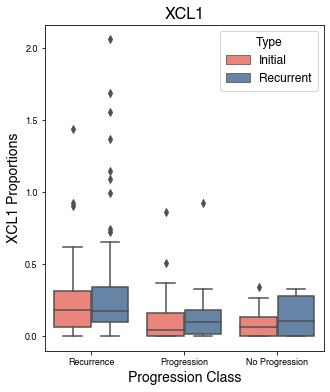

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
#plt.rcParams['font.size'] = '8'
plt.title("XCL1", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=XCL1_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("XCL1 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [16]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = XCL1_mdf.loc[XCL1_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.9757167568515103, pvalue=0.3292048459535818)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.4684013275601728, pvalue=0.1419952412031081)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.2909944487358056, pvalue=0.19670560245894686)
--------------------------------


In [17]:
#XCL2
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "XCL2"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "XCL2"]
recurrence.columns = ['Recurrent']
XCL2_data = initial.join(recurrence)
XCL2_final = pd.concat([grade_data, XCL2_data], axis=1)
XCL2_final.index.name = 'Mixture'
XCL2_final = XCL2_final.drop(['Grade_1', 'Grade_2'], axis=1)
XCL2_final = XCL2_final.sort_values(by='Mixture')
XCL2_mdf = pd.melt(XCL2_final.reset_index(), id_vars=('Mixture','Progression'))
XCL2_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,0.162947
1,PS002,Recurrence,Initial,0.183664
2,PS003,Recurrence,Initial,0.001362
3,PS004,Recurrence,Initial,0.000094
4,PS005,Recurrence,Initial,0.000873
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,0.002413
358,PSX16,Recurrence,Recurrent,0.395604
359,PSX17,Recurrence,Recurrent,1.406374
360,PSX18,Recurrence,Recurrent,0.208911


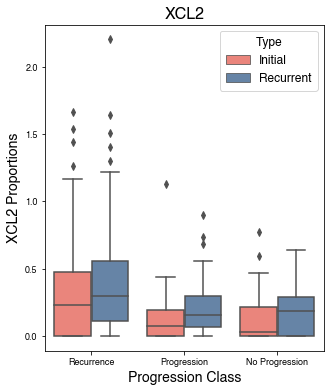

In [18]:
plt.figure(figsize=(5,6))
plt.title("XCL2", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=XCL2_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("XCL2 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [19]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = XCL2_mdf.loc[XCL2_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.3767199235291903, pvalue=0.16859885648583983)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.750539573903612, pvalue=0.0800252516967536)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.326203388246782, pvalue=0.18477233730537856)
--------------------------------


In [20]:
#KLRC1
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "KLRC1"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "KLRC1"]
recurrence.columns = ['Recurrent']
KLRC1_data = initial.join(recurrence)
KLRC1_final = pd.concat([grade_data, KLRC1_data], axis=1)
KLRC1_final.index.name = 'Mixture'
KLRC1_final = KLRC1_final.drop(['Grade_1', 'Grade_2'], axis=1)
KLRC1_final = KLRC1_final.sort_values(by='Mixture')
KLRC1_mdf = pd.melt(KLRC1_final.reset_index(), id_vars=('Mixture','Progression'))
KLRC1_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,0.204370
1,PS002,Recurrence,Initial,0.143162
2,PS003,Recurrence,Initial,0.001362
3,PS004,Recurrence,Initial,0.016261
4,PS005,Recurrence,Initial,0.000873
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,0.002413
358,PSX16,Recurrence,Recurrent,0.003727
359,PSX17,Recurrence,Recurrent,0.115586
360,PSX18,Recurrence,Recurrent,0.078045


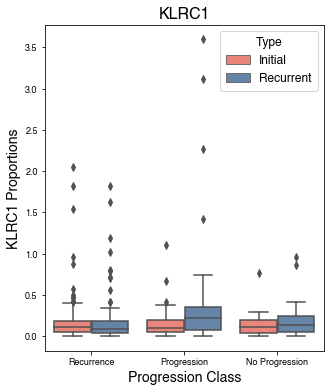

In [23]:
plt.figure(figsize=(5,6))
plt.title("KLRC1", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=KLRC1_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("KLRC1 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [22]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = KLRC1_mdf.loc[KLRC1_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=0.3785331616483273, pvalue=0.7050345637671338)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.173746943418771, pvalue=0.029724145080487763)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.8919598009447384, pvalue=0.3724144794266213)
--------------------------------
